In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# principals = pd.read_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/title.principals.tsv", sep="\t")
# rating = pd.read_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/title.ratings.tsv", sep="\t")
# df = pd.read_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/best_rated_actors.tsv", sep="\t")
# names = pd.read_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/name.basics.tsv", sep="\t")
names = pd.read_csv("C:\\Users\\orfor\\OneDrive\\Desktop\\NeedleInADataHaystack\\data\\name.basics.tsv", sep="\t", index_col='nconst')

In [60]:
basics = pd.read_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/title.basics.tsv", sep="\t")

/tmp/ipykernel_2731469/1019101808.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/title.basics.tsv", sep="\t")


In [85]:
basics.titleType

tconst
tt0000001        short
tt0000002        short
tt0000003        short
tt0000004        short
tt0000005        short
               ...    
tt9916848    tvEpisode
tt9916850    tvEpisode
tt9916852    tvEpisode
tt9916856        short
tt9916880    tvEpisode
Name: titleType, Length: 11692386, dtype: object

In [97]:
df['year'] = df['tconst'].map(basics['startYear'])
df['titleType'] = df['tconst'].map(basics['titleType'])
df.to_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/best_collaborations.tsv", sep="\t")

/tmp/ipykernel_2731469/277329639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['tconst'].map(basics['startYear'])
/tmp/ipykernel_2731469/277329639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['titleType'] = df['tconst'].map(basics['titleType'])


In [3]:
df = pd.read_csv("C:\\Users\\orfor\\OneDrive\\Desktop\\NeedleInADataHaystack\\data\\best_collaborations.tsv", sep="\t");

In [4]:
df['year'] = df.year.astype(int)
new_movies = df[(df.year >= 1990) & (df.titleType == 'movie')]
new_movies

,Unnamed: 0,tconst,ordering,nconst,category,job,characters,averageRating,numVotes,primaryName,year,titleType
16293,19322,tt0095111,1,nm0952304,actor,\N,"[""Muntaser Abdulghaffar""]",7.70,1227.00,Ahmed Zaki,1991,movie
16294,19323,tt0095111,2,nm1507045,actress,\N,"[""Sabah""]",7.70,1227.00,Hala Sedki,1991,movie
16295,19324,tt0095111,3,nm1193571,actor,\N,"[""Forger Mr. Makhzangi""]",7.70,1227.00,Salah Abdalla,1991,movie
16296,19325,tt0095111,4,nm4951669,actor,\N,\N,7.70,1227.00,Mohamed Abu Hashish,1991,movie
16297,19326,tt0095111,5,nm13500922,actor,\N,"[""Muntaser's uncle and Zainab's father""]",7.70,1227.00,Ahmad Abu-Abiyyah,1991,movie
...,...,...,...,...,...,...,...,...,...,...,...,...
318605,362773,tt9900782,6,nm5782889,actor,\N,"[""Stephen Raj""]",8.40,47077.00,Hareesh Peradi,2019,movie
318606,362774,tt9900782,7,nm6030469,actor,\N,"[""Tips""]",8.40,47077.00,Ramana,2019,movie
318607,362775,tt9900782,8,nm7639503,actor,\N,"[""Kamatchi""]",8.40,47077.00,Dheena,2019,movie
318608,362776,tt9900782,9,nm7130871,actor,\N,"[""Kamatchi's Paternal Uncle""]",8.40,47077.00,Suryakanth,2019,movie


In [5]:
df = df.merge(names, on='nconst', how='left')

In [6]:
df = df.drop_duplicates(subset=['nconst','tconst'])

In [58]:
df.to_csv("/homes/adirt/repos/py/packages/NeedleInADataHaystack/data/best_rated_actors.tsv", sep="\t", index=False)

In [7]:
import networkx as nx
from itertools import combinations
from tqdm import tqdm

# Group all people by tconst (movie/episode)
grouped = new_movies.groupby('tconst')['nconst'].apply(list)

# Initialize an undirected graph
G = nx.Graph()

# Add edges between all pairs of people who worked on the same title
for people in tqdm(grouped):
    for person1, person2 in combinations(set(people), 2):
        if G.has_edge(person1, person2):
            G[person1][person2]['weight'] += 1
        else:
            try:
                name1 = names.loc[person1].values[0]
                name2 = names.loc[person2].values[0]
            except KeyError:
                name1 = "Unknown"
                name2 = "Unknown"
            G.add_node(person1, label=name1)
            G.add_node(person2, label=name2)
            G.add_edge(person1, person2, weight=1)

100%|██████████| 2545/2545 [00:10<00:00, 245.49it/s]


In [8]:
max_degree_node = max(G.degree, key=lambda x: x[1])
min_degree_node = min(G.degree, key=lambda x: x[1])

max_weight = max([data['weight'] for _, _, data in G.edges(data=True)])
min_weight = min([data['weight'] for _, _, data in G.edges(data=True)])

print(f"Max Degree: {max_degree_node[1]}, Node: {max_degree_node[0]}")
print(f"Min Degree: {min_degree_node[1]}, Node: {min_degree_node[0]}")
print(f"Max Edge Weight: {max_weight}")
print(f"Min Edge Weight: {min_weight}")
len_nodes = len(G.nodes)
print(f"Number of Nodes: {len_nodes}")

Max Degree: 282, Node: nm0621937
Min Degree: 1, Node: nm1828145
Max Edge Weight: 10
Min Edge Weight: 1
Number of Nodes: 15939


Text(0.5, 1.0, 'Actor Collaboration Graph (Sample)')

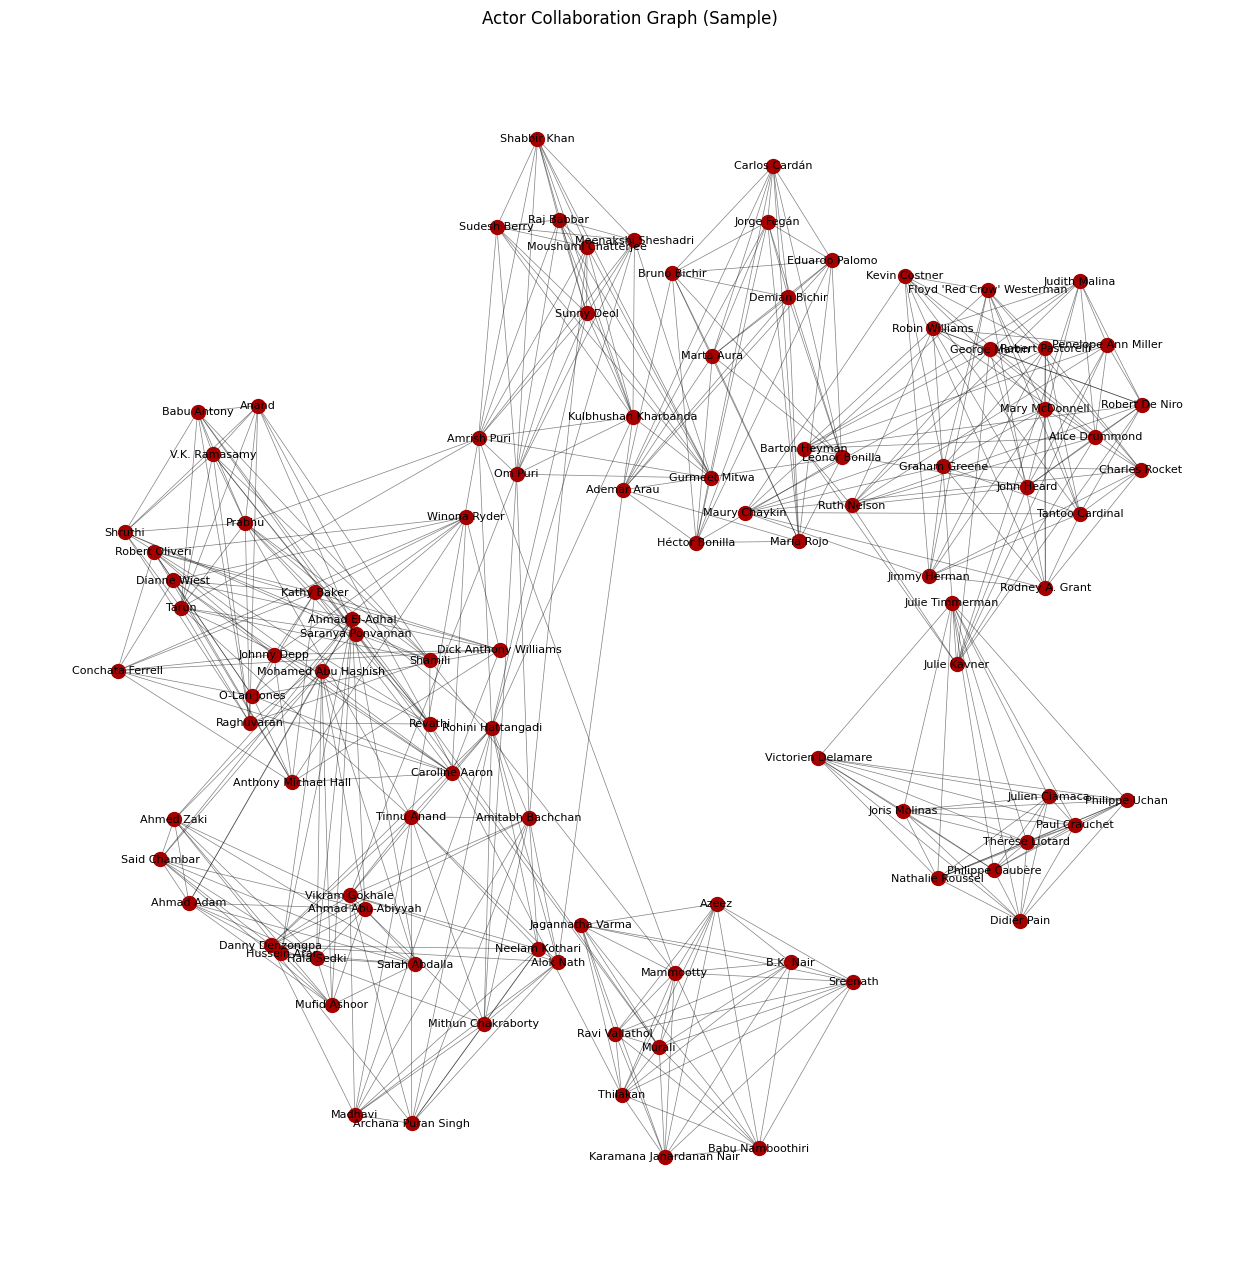

In [21]:
# Example: use a subset for readability
H = G.subgraph(list(G.nodes)[:100])

# Position nodes using spring layout with increased spacing (k)
pos = nx.spring_layout(H, k=0.8, seed=42)  # Increase k to spread nodes out

# Draw with labels and edge widths
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(H, pos, node_size=100, node_color='#A40000')
nx.draw_networkx_edges(H, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(H, pos, labels=nx.get_node_attributes(H, 'label'), font_size=8)

plt.axis('off')
plt.title("Actor Collaboration Graph (Sample)")
plt.savefig("/homes/adirt/repos/py/packages/NeedleInADataHaystack/figures/top_actors_collaborations.png", dpi=300, bbox_inches='tight')

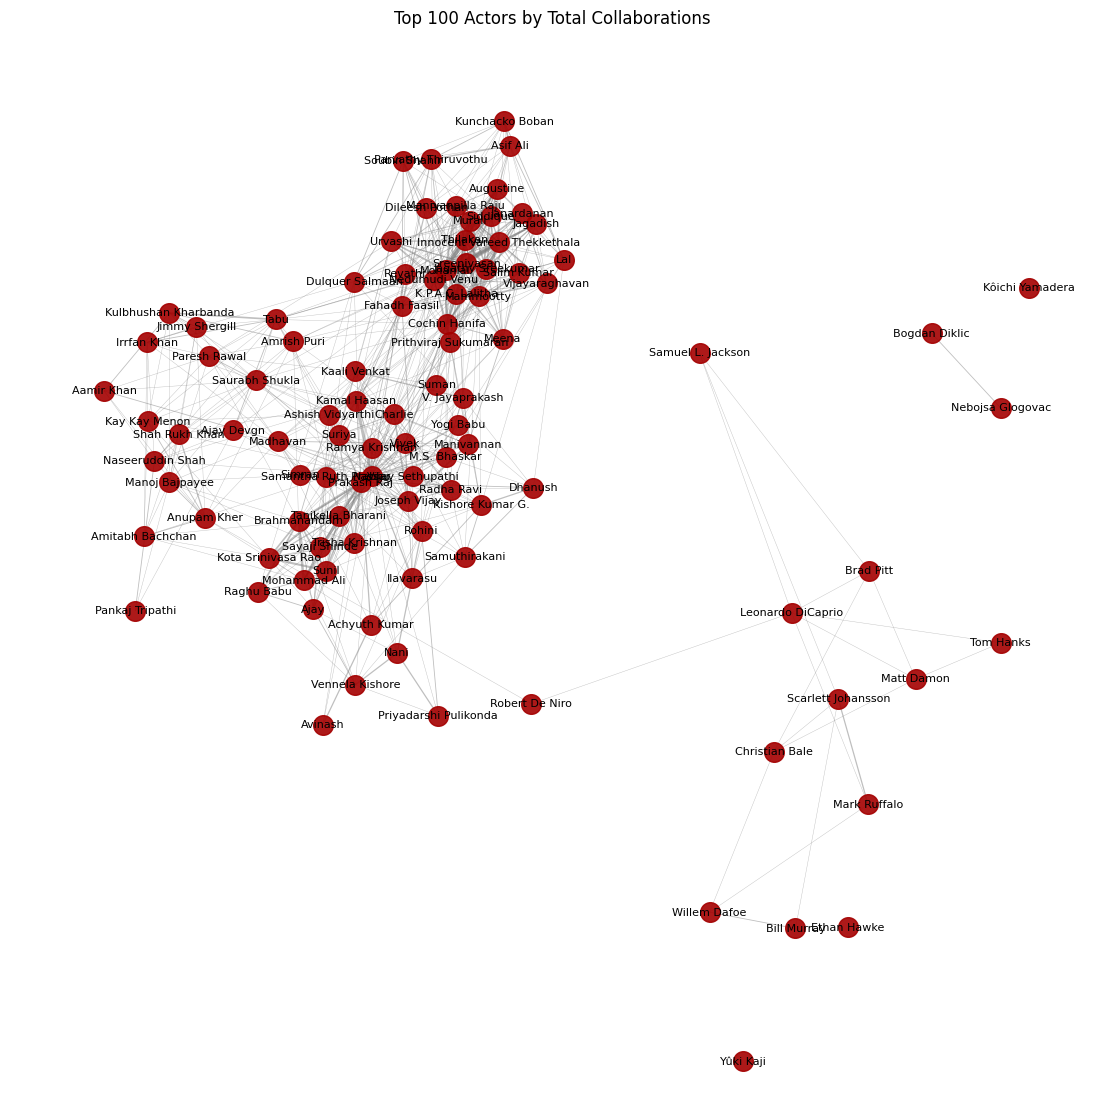

In [16]:

# 1. Compute each actor’s weighted degree (sum of collaboration counts)
weighted_deg = dict(G.degree(weight="weight"))

# 2. Sort actors by descending weighted degree
sorted_by_deg = sorted(weighted_deg.items(), key=lambda x: x[1], reverse=True)

# 3. Pick the top N actors
top_n = 100  # <-- change this to however many “most prominent” actors you want
top_actors = [node for node, _ in sorted_by_deg[:top_n]]

# 4. Induce the subgraph on just those top actors
H = G.subgraph(top_actors)

# 5. Compute positions with a spring layout
pos = nx.spring_layout(H, k=0.4, seed=42)

# 6. Draw
plt.figure(figsize=(14, 14))

# a) draw nodes
nx.draw_networkx_nodes(
    H,
    pos,
    node_size=200,           # you can increase or decrease
    node_color="#A40000",
    alpha=0.9,
)

# b) draw edges (width scaled by weight)
#    you can scale the width (e.g., *0.2) if they are too thick
edge_weights = [H[u][v]["weight"] for u, v in H.edges()]
nx.draw_networkx_edges(
    H,
    pos,
    width=[w * 0.3 for w in edge_weights],
    alpha=0.5,
    edge_color="gray",
)

# c) draw labels (assumes each node has a 'label' attribute with actor name)
nx.draw_networkx_labels(
    H,
    pos,
    labels=nx.get_node_attributes(H, "label"),
    font_size=8,
)

plt.axis("off")
plt.title(f"Top {top_n} Actors by Total Collaborations")
# plt.savefig("/homes/adirt/repos/py/packages/NeedleInADataHaystack/figures/top_actors_collaborations.png", dpi=300, bbox_inches='tight')
plt.savefig("C:\\Users\\orfor\\OneDrive\\Desktop\\NeedleInADataHaystack\\figures\\top_actors_collaborations.png", dpi=300, bbox_inches='tight');